<a href="https://colab.research.google.com/github/krag-harsh/pytorch/blob/master/2_2_Linear_regression_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#The class plot_diagram helps us to visualize the data space and the parameter space during training and has nothing to do with PyTorch.
# The class for plotting

class plot_diagram():
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
        
    # Destructor
    def __del__(self):
        plt.close('all')

we will be creating our own data using our own parameters, this will help us to check our prameters

torch.arange(start=0, end, step=1, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
Returns a 1-D tensor of size $ \frac{\text{end} - \text{start}}{\text{step}}$ with values from the interval [start, end) taken with common difference step beginning from start.

Note that non-integer step is subject to floating point rounding errors when comparing against end; to avoid inconsistency, we advise adding a small epsilon to end in such cases.

$\text{out}_{{i+1}} = \text{out}_{i} + \text{step}$


.view()- reshapes the tensor to the desired dimension

-1 is used if we don't know the exact value

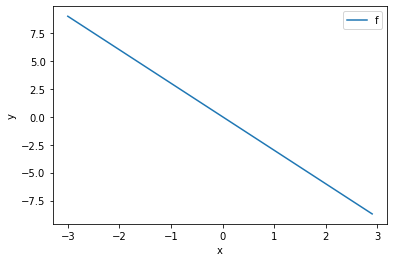

In [10]:
# Create the f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


#print(X.size())

Let us add some noise to the data in order to simulate the real data. Use <code>torch.randn(X.size())</code> to generate Gaussian noise that is the same size as <code>X</code> and has a standard deviation opf 0.1.

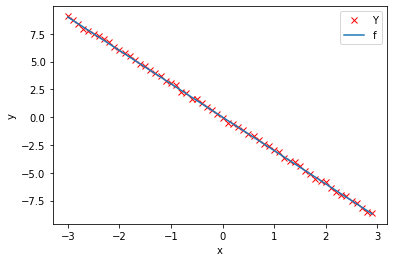

In [4]:
# Add some noise to f(X) and save it in Y
Y = f + 0.1 * torch.randn(X.size())

# Plot the data points
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h2 id="Model_Cost">Create the Model and Cost Function (Total Loss)</h2>
In this section, let us create the model and the cost function (total loss) we are going to use to train the model and evaluate the result.

First, define the <code>forward</code> function $y=w*x$. (We will add the bias in the next lab.)

In [5]:
# Create forward function for prediction
def forward(x):
    return w * x

# Create the MSE(mean square error)(cost function) function for evaluate the result.
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [6]:
# Create Learning Rate and an empty list to record the loss for each iteration
lr = 0.1
LOSS = []

w = torch.tensor(-10.0, requires_grad = True)

#Create a plot_diagram object to visualize the data space and the parameter space for each iteration during training:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

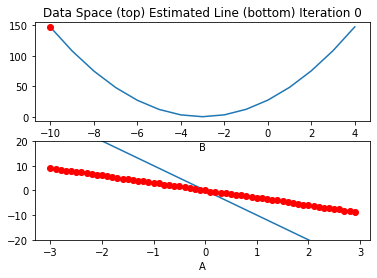

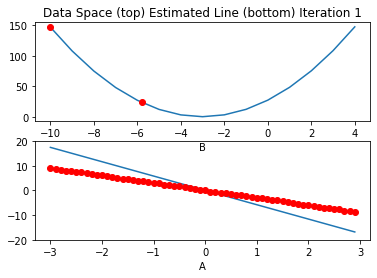

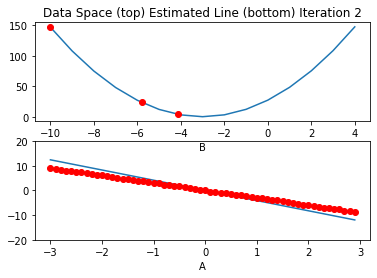

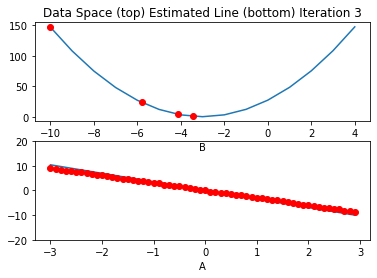

<Figure size 432x288 with 0 Axes>

In [7]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

# Give 4 iterations for training the model here.

train_model(4)

Text(24.0, 0.5, 'Cost')

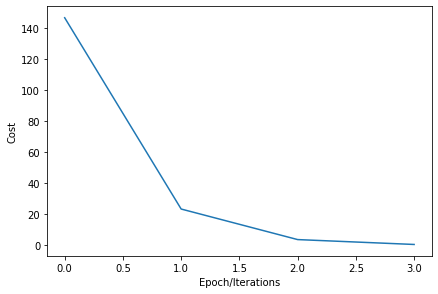

In [8]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")